In [1]:
import pandas as pd
#display all the columns of dataset
pd.set_option("display.max_columns",None)

import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from joblib import dump#for saving encoder,scaler and selected_features

In [2]:
dataset=pd.read_csv("AgeDataset-V1.csv")

In [3]:
dataset

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
0,Q23,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,natural causes,67.0
1,Q42,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001.0,natural causes,49.0
2,Q91,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865.0,homicide,56.0
3,Q254,Wolfgang Amadeus Mozart,Austrian composer of the Classical period,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,NaN,35.0
4,Q255,Ludwig van Beethoven,German classical and romantic composer,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,NaN,57.0
...,...,...,...,...,...,...,...,...,...,...
1223004,Q77247326,Marie-Fortunée Besson,Frans model (1907-1996),NaN,France,Tailor; model,1907,1996.0,NaN,89.0
1223005,Q77249504,Ron Thorsen,xugador de baloncestu canadianu (1948–2004),NaN,Canada; United States of America,Athlete,1948,2004.0,NaN,56.0
1223006,Q77249818,Diether Todenhagen,German navy officer and world war II U-boat co...,NaN,Germany,Military personnel,1920,1944.0,NaN,24.0
1223007,Q77253909,Reginald Oswald Pearson,"English artist, working in stained glass, prin...",Male,United Kingdom,Artist,1887,1915.0,NaN,28.0


# EDA

## 1) Missing Values

In [4]:
features_with_na=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>=1]

for feature in features_with_na:
    print("{} {} % of missing values".format(feature,
                                             np.round(dataset[feature].isnull().sum()*100/len(dataset[feature]),4)))

Short description 5.5519 % of missing values
Gender 10.9276 % of missing values
Country 27.4331 % of missing values
Occupation 16.9184 % of missing values
Death year 0.0001 % of missing values
Manner of death 95.6171 % of missing values
Age of death 0.0001 % of missing values


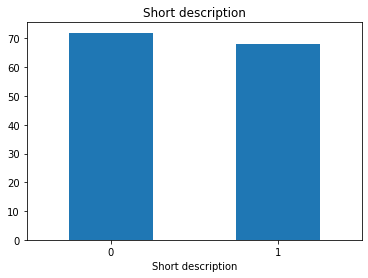

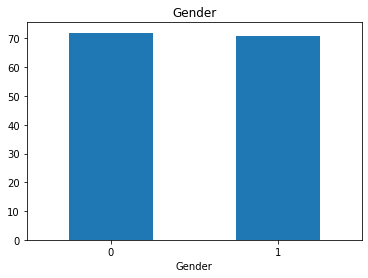

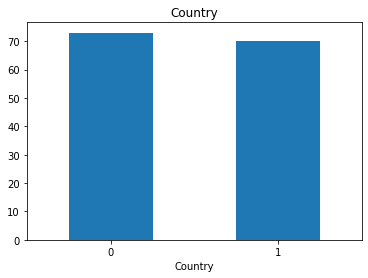

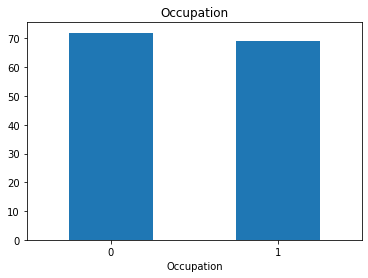

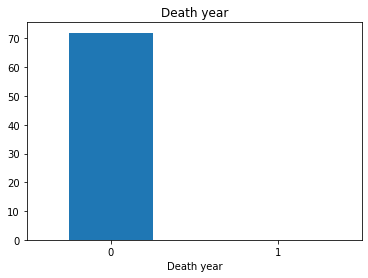

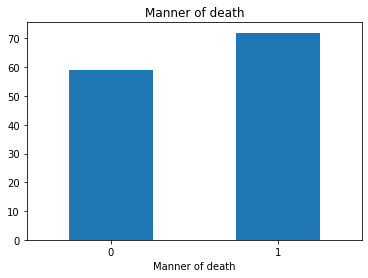

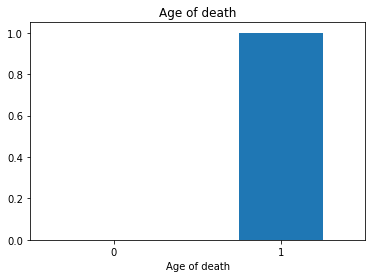

In [5]:
#relationship between missing values and their age

data=dataset.copy()
for feature in features_with_na:
    data[feature]=np.where(data[feature].isnull(),1,0)
    #calculate mean age of death where data is missing or present
    data.groupby(feature)["Age of death"].median().plot.bar(x=feature,y="mean age of death",rot=0)
    plt.title(feature)
    plt.show()

## 2) Numerical Features

In [6]:
numerical_features=[feature for feature in dataset.columns if dataset[feature].dtypes!="O"]

In [7]:
numerical_features

['Birth year', 'Death year', 'Age of death']

### Temporal variables

Text(0.5, 1.0, 'Birth year vs medain age of death')

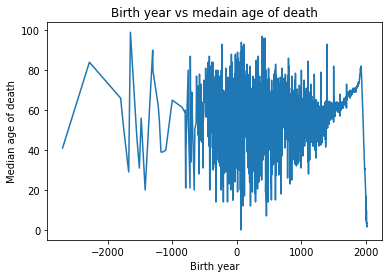

In [8]:
#Relationship between birth year and age of death
dataset.groupby("Birth year")["Age of death"].median().plot()
plt.xlabel('Birth year')
plt.ylabel('Median age of death')
plt.title("Birth year vs medain age of death")


<AxesSubplot:xlabel='Birth year'>

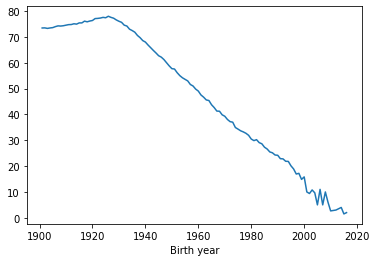

In [9]:
#1900 - 2020
dataset[dataset["Birth year"]>1900].groupby("Birth year")["Age of death"].mean().plot()

<AxesSubplot:xlabel='Birth year'>

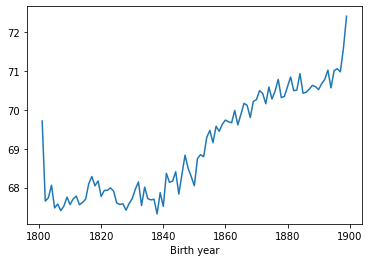

In [10]:
#1800-1900
dataset[(dataset["Birth year"]<1900) & (dataset["Birth year"]>1800)].groupby("Birth year")["Age of death"].mean().plot()
 

In [11]:
dataset[dataset["Birth year"]>2015]

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
1058191,Q31206273,Charlie Gard,"English child, whose medical treatment was the...",Male,NaN,NaN,2016,2017.0,NaN,1.0
1171519,Q60710025,Julen Roselló,accident victim,NaN,Spain,NaN,2016,2019.0,accident,3.0


There is a sudden unusual decrease in after 2015,it has happened as a result of the lack of more generalized data.
There are not much we can get from a Birth year vs mean age of death graph,except an effect of a sudden pandamic(There may be some pandamics which may increase the infant deaths!But we cannot figure anything because graph is messy).It‘s a good idea to look at more generalized view of data by living period vs mean lifespan graph

In [12]:
print(dataset["Birth year"].isnull().sum())
print(dataset["Death year"].isnull().sum())
print(dataset["Age of death"].isnull().sum())

0
1
1


In [13]:
#dropping one record having both columns null
data=dataset.copy()
data.dropna(subset=["Death year","Age of death"],inplace=True)



In [14]:
data

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
0,Q23,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,natural causes,67.0
1,Q42,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001.0,natural causes,49.0
2,Q91,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865.0,homicide,56.0
3,Q254,Wolfgang Amadeus Mozart,Austrian composer of the Classical period,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,NaN,35.0
4,Q255,Ludwig van Beethoven,German classical and romantic composer,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,NaN,57.0
...,...,...,...,...,...,...,...,...,...,...
1223004,Q77247326,Marie-Fortunée Besson,Frans model (1907-1996),NaN,France,Tailor; model,1907,1996.0,NaN,89.0
1223005,Q77249504,Ron Thorsen,xugador de baloncestu canadianu (1948–2004),NaN,Canada; United States of America,Athlete,1948,2004.0,NaN,56.0
1223006,Q77249818,Diether Todenhagen,German navy officer and world war II U-boat co...,NaN,Germany,Military personnel,1920,1944.0,NaN,24.0
1223007,Q77253909,Reginald Oswald Pearson,"English artist, working in stained glass, prin...",Male,United Kingdom,Artist,1887,1915.0,NaN,28.0


Let‘s try to figure out whether there is a relationship between century and mean lifespan.By doing that,we can get a rough idea about the effect of time period to lifespan.We choose 100 years as our time slot because mean lifespan within a century conveys how periodical conditions(Medical development,cultural development) affect lifespan.
But in terms of war,long term pandamics and short term droughts(upto 5 years),we have to reduce time slot to 5-10 years.
Also,there may be some short term disasters like Tsunami,short term pandemics(last for 1-2 years) and short term wars(1-2 years).In order to analyse those effects to lifespan we have to pay our attention to sudden unusual peaks in Death year and Mean age of death graph.

In [15]:
#Century vs Mean age of death
#Creating new column "Century" presenting each person‘s century
time_slot=100
data["Century"]=np.where((np.ceil(data["Birth year"]/time_slot)*time_slot-data["Birth year"])>
                         (data["Death year"]-np.floor(data["Death year"]/time_slot)*time_slot),
                         (np.floor(data["Birth year"]/100)*100),(np.floor(data["Death year"]/time_slot)*time_slot))

<AxesSubplot:xlabel='Century'>

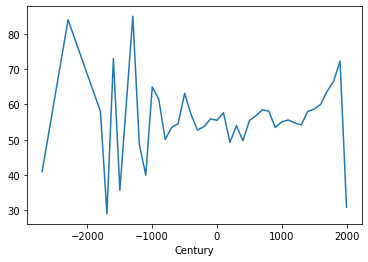

In [16]:
data.groupby("Century")["Age of death"].mean().plot()

Conclusion:-
Look at two graphs of birth year vs age and century vs age.We can say that century vs age graph gives a more generalized view of birth year vs age graph because the pattern is same and the messy spikes in birth year vs age graph has been omitted when it comes to century vs age.
So,we can consider about substitute birth year by century(living period) when we train our model.But we have to finetune the living period by considering reduction of 100 years to 50 then 10 and finally 5 if it requires.
There is no any considerable effect from Birth year to age,so we can definitely omit birth year.But there is a hidden information in birth year.That is the temporal circumstances.Yes we can compensate it with including Death year but I think it is better to give those temporal information in more generalized manner by including above mentioned time period(century,decade) figure to our model.

<AxesSubplot:xlabel='Death year'>

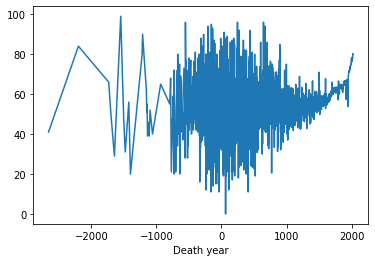

In [17]:
# Death year vs Age of death

dataset.groupby("Death year")["Age of death"].mean().plot()

Text(0, 0.5, 'Mean age of death')

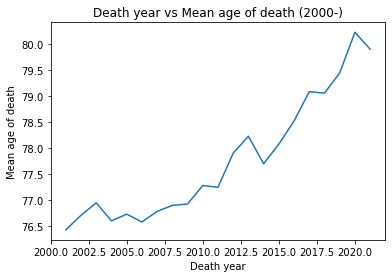

In [18]:
#Death year vs mean age of death after 2000
dataset[dataset["Death year"]>2000].groupby("Death year")["Age of death"].mean().plot()
plt.title("Death year vs Mean age of death (2000-)")
plt.ylabel("Mean age of death")

Text(0, 0.5, 'Death count')

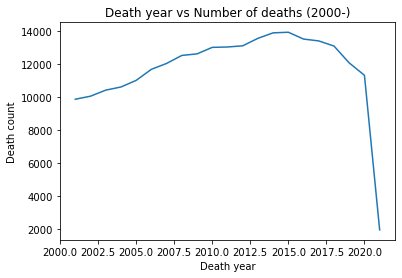

In [19]:
#Death year vs Number of deaths after 2000
dataset[dataset["Death year"]>2000].groupby("Death year")["Age of death"].count().plot()
plt.title("Death year vs Number of deaths (2000-)")
plt.ylabel("Death count")

Although we expect an increase during the pandemic,we cannot see anything because there is a lack of recent records (only 2 records after 2015).So,the trained model may not give accepltable results for records which has been taken recently(roughly after 2015)

Text(0, 0.5, 'Mean age of death')

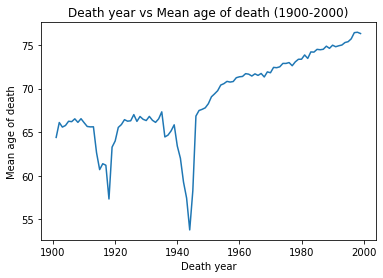

In [20]:
#Death year vs mean age of death in 20th century
dataset[(dataset["Death year"]<2000) & (dataset["Death year"]>1900)].groupby("Death year")["Age of death"].mean().plot()
plt.title("Death year vs Mean age of death (1900-2000)")
plt.ylabel("Mean age of death")

Text(0, 0.5, 'Death count')

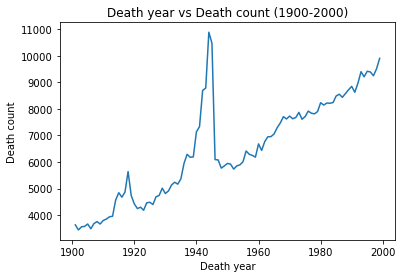

In [21]:
#Death year vs Number of deaths in 20th century
dataset[(dataset["Death year"]<2000) & (dataset["Death year"]>1900)].groupby("Death year")["Age of death"].count().plot()
plt.title("Death year vs Death count (1900-2000)")
plt.ylabel("Death count")

When we look at above Death year vs Death count graph we can say that the affect of world war 1(roughly 1915-1920) and world war 2(roughly 1940-1945) is highly outstanding.
The mean age of death during those two eras have been dropped down also.(In Death year vs Mean age of death graph)

I must emphasize that there are no much to say about lifespan by only looking at Death year except unsual sudden circumstances(wars or pandamics) but sometimes it is hard to say it by looking at mean because in some pandamics the majority of deaths may fallen to older age groups and the deviation from normal lifespan level may be less.
But in wars,many young and middle aged groups are killed.Due to that the deviation of the mean value of lifespan from normal lifespan value in that period is defenetly outstanding.That is the reason for the sudden drops in mean age of death graph and sudden spikes of death count graph in 20th century

### Continuos variables

### 1) Age of death

<AxesSubplot:>

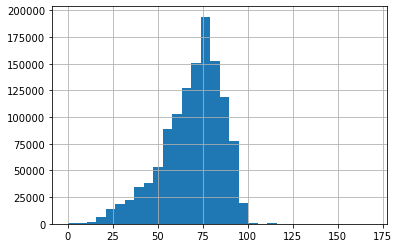

In [22]:
#only age of death feature

dataset["Age of death"].hist(bins=32)


<AxesSubplot:>

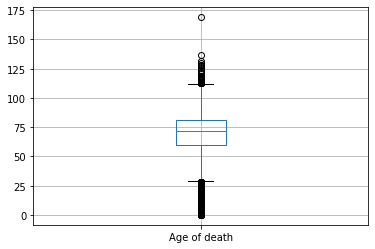

In [23]:
dataset.boxplot(column="Age of death")

<AxesSubplot:>

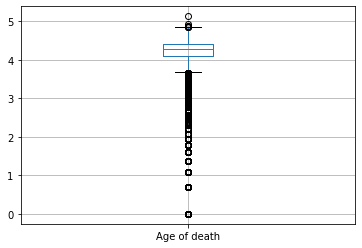

In [24]:

data=dataset.copy()
#Drop Age column nulls
data.dropna(inplace=True,subset=["Age of death"])

#data=data.drop(data[data["Age of death"]==0].index)


#Check whether it reduces outliers after log scaling
data["Age of death"]=np.log(data["Age of death"]+1)

data.boxplot(column="Age of death")

There is no any result by log scaling age.It reduces the outliers above maximum but it increases the amount of outliers below minimum.Let‘s figure out the percentages of outliers and whether they are mild or extreme.

In [25]:
data=dataset.copy()
#Dropping Age column nulls
data.dropna(subset=["Age of death"],inplace=True)

#Detecting outliers using the Inter Quantile Range(IQR)

def detect_outliers_iqr(data,cofactor=1.5):#cofactor=1.5 for mild and 3 for extreme outliers
    outliers=[]
    data=sorted(data)
    q1=np.percentile(data,25)
    
    q2=np.percentile(data,75)
    
    IQR=q2-q1

    lower_bound=q1-cofactor*IQR
    
    upper_bound=q2+cofactor*IQR
    
    for i in data:
        if (i<lower_bound or i>upper_bound):
            outliers.append(i)
            
    return outliers
outliers_age_mild=detect_outliers_iqr(np.array(data["Age of death"]))
outliers_age_extreme=detect_outliers_iqr(np.array(data["Age of death"]),cofactor=3)




In [26]:
print("{} % percentage mild outliers".format(np.round(len(outliers_age_mild)*100/dataset.shape[0],4)))
print("{} % percentage extreme outliers".format(np.round(len(outliers_age_extreme)*100/dataset.shape[0],4)))


2.4001 % percentage mild outliers
0.0001 % percentage extreme outliers


We have 3 approaches:-

1)ignore the affect of outliers

2)trimming outliers

3)Quantile based flooring and capping

4)Mean/median imputation

We have to check each approaches and pick the best one.

### 2) Death year

<AxesSubplot:>

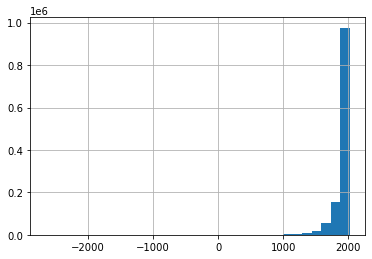

In [27]:
dataset["Death year"].hist(bins=32)


<AxesSubplot:>

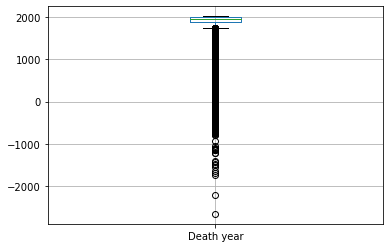

In [28]:
dataset.boxplot(column="Death year")

<AxesSubplot:>

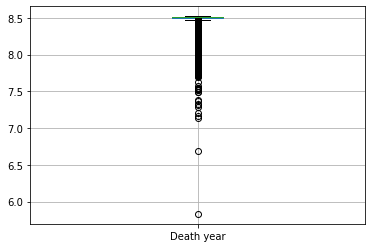

In [29]:

data=dataset.copy()
#Drop Death year column nulls
data.dropna(inplace=True,subset=["Death year"])

#data=data.drop(data[data["Death year"]<=0].index)


#Check whether it reduces outliers after log scaling
data["Death year"]=np.log(data["Death year"]+3000)

data.boxplot(column="Death year")


Log scaling is useless.So,we have to the percentages of outliers and take appropriate remedies.

In [30]:
data=dataset.copy()
#Dropping Death year column nulls
data.dropna(subset=["Death year"],inplace=True)

#Detecting outliers using the Inter Quantile Range(IQR)

def detect_outliers_iqr(data,cofactor=1.5):#cofactor=1.5 for mild and 3 for extreme outliers
    outliers=[]
    data=sorted(data)
    q1=np.percentile(data,25)
    
    q2=np.percentile(data,75)
    
    IQR=q2-q1

    lower_bound=q1-cofactor*IQR
    
    upper_bound=q2+cofactor*IQR
    
    for i in data:
        if (i<lower_bound or i>upper_bound):
            outliers.append(i)
            
    return outliers
outliers_age_mild=detect_outliers_iqr(np.array(data["Death year"]))
outliers_age_extreme=detect_outliers_iqr(np.array(data["Death year"]),cofactor=3)

In [31]:
print("{} % percentage mild outliers".format(np.round(len(outliers_age_mild)*100/dataset.shape[0],4)))
print("{} % percentage extreme outliers".format(np.round(len(outliers_age_extreme)*100/dataset.shape[0],4)))


8.1659 % percentage mild outliers
3.1777 % percentage extreme outliers


The outlier percentages are very high so we cannot trim outliers.We have to use quantilie based trimming or capping

## 3) Categorical Features

In [32]:
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtypes=="O"]

In [33]:
categorical_features

['Id',
 'Name',
 'Short description',
 'Gender',
 'Country',
 'Occupation',
 'Manner of death']

We can ommit Id and Short description column

In [34]:
for feature in categorical_features:
    print("{} categories in {}".format(len(dataset[feature].unique()),feature))

1222997 categories in Id
1130871 categories in Name
512440 categories in Short description
21 categories in Gender
5962 categories in Country
9314 categories in Occupation
207 categories in Manner of death


<AxesSubplot:xlabel='Gender'>

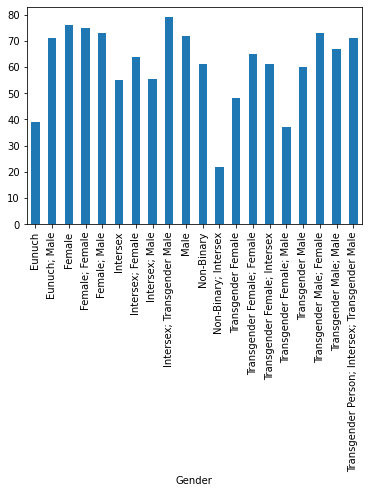

In [35]:
#Gender
dataset.groupby("Gender")["Age of death"].median().plot.bar()

<AxesSubplot:xlabel='Manner of death'>

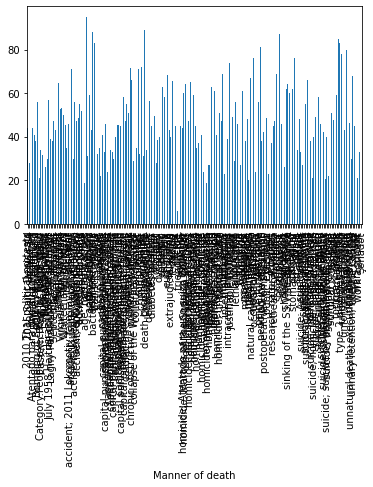

In [36]:
#Manner of death
dataset.groupby("Manner of death")["Age of death"].median().plot.bar()

Because there are a lot of categories in some features,we have to do feature engineering and handle rare categories.Then look at the bar plots.

In [37]:
#handle categorical features
def feature_eng(data):
    
    #handle nans in categorical features-replace nans with missing values
    categorical_nan=[feature for feature in data.columns if data[feature].dtypes=="O" and data[feature].isnull().sum()>=1]
    data[categorical_nan]=data[categorical_nan].fillna("Missing")
    
    #handle nans in numerical features-drop rows because there is only one missing value
    numerical_nan=[feature for feature in data.columns if data[feature].dtypes!="O" and data[feature].isnull().sum()>=1]
    data.dropna(subset=numerical_nan,inplace=True)
    
    #outliers
    
    #handling rare categorical features
    categorical_features=[feature for feature in data.columns if data[feature].dtypes=="O"]
    for feature in categorical_features:
        temp=data.groupby(feature)['Age of death'].count()/len(data)
        temp_df=temp[temp>0.01].index
        data[feature]=np.where(data[feature].isin(temp_df),data[feature],'Rare_var')

    
    return data

In [38]:
data=dataset.copy()
data=feature_eng(data)

Now let‘s look at categorical features once again

In [39]:
categorical_features=[feature for feature in data.columns if data[feature].dtypes=="O"]

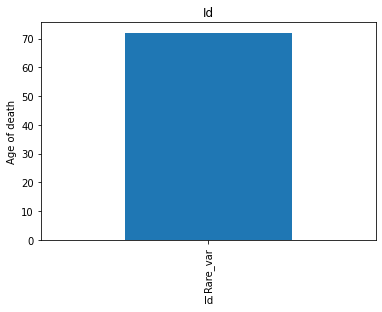

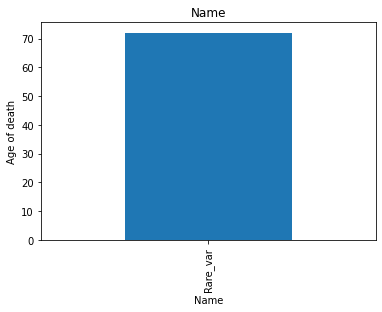

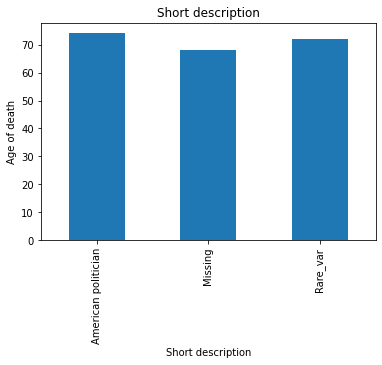

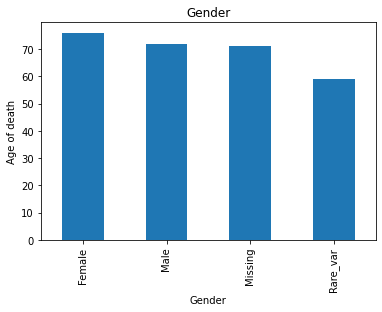

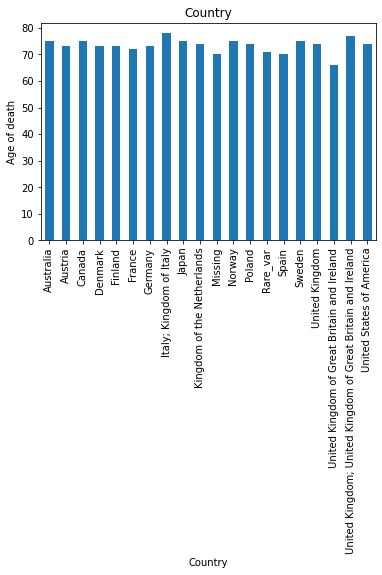

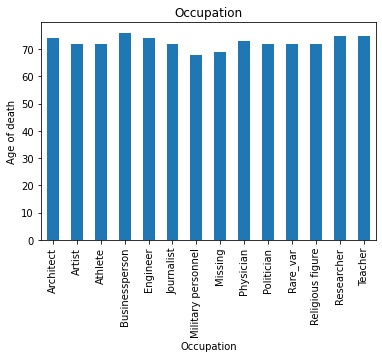

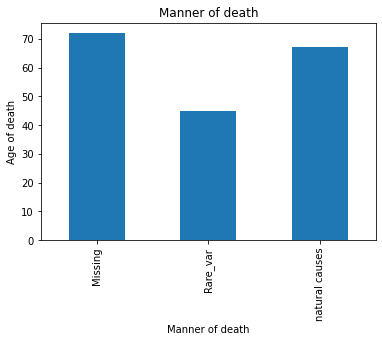

In [40]:
for feature in categorical_features:
    data.groupby(feature)["Age of death"].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Age of death')
    plt.title(feature)
    plt.show()
    

In [41]:
dataset["Name"]

0                George Washington
1                    Douglas Adams
2                  Abraham Lincoln
3          Wolfgang Amadeus Mozart
4             Ludwig van Beethoven
                    ...           
1223004      Marie-Fortunée Besson
1223005                Ron Thorsen
1223006         Diether Todenhagen
1223007    Reginald Oswald Pearson
1223008               Horst Lerche
Name: Name, Length: 1223009, dtype: object

In [42]:
#feature engineering on person's title 
data=dataset.copy()
data.dropna(subset=["Name"],inplace=True)
data['name_title'] = data["Name"].apply(lambda x: x.split('.')[0].strip())

There are no any special title names infront of them.So we omit Name column also

Definitely we have to perform a rare category handeling for Country column and Occupation column.

# Feature Engineering


In [43]:
#devide dataset into features and labels
dataset_features=dataset.drop(["Age of death"],axis=1)
dataset_labels=dataset["Age of death"]

In [44]:
#Split dataset in train and test categories
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(dataset_features,dataset_labels,test_size=0.1,random_state=0)

### Save non feature engineered raw test dataset 

In [45]:
test_dataset=pd.concat([test_data,test_target],axis=1)

test_dataset.to_csv("row_test_dataset.csv",index=False)

### Preprocessing starts in train dataset

In [46]:
#concatanate train data and target for feature engineering
train_dataset=pd.concat([train_data,train_target],axis=1)

We perform 4 steps to our dataset by below function

1)handle missing vals

2)handle rare categorical features

3)create "Century column"

4)drop unwanted columns

In [47]:

def feature_eng(data):
    
    #handle nans in categorical features-replace nans with missing values
    categorical_nan=[feature for feature in data.columns if data[feature].dtypes=="O" and data[feature].isnull().sum()>=1]
    data[categorical_nan]=data[categorical_nan].fillna("Missing")
    
    #handle nans in numerical features-drop rows because there is only one missing value
    numerical_nan=[feature for feature in data.columns if data[feature].dtypes!="O" and data[feature].isnull().sum()>=1]
    data.dropna(subset=numerical_nan,inplace=True)
    
    #outliers if needed
    
    #handling rare categorical features
    categorical_features=[feature for feature in data.columns if data[feature].dtypes=="O"]
    for feature in categorical_features:
        temp=data.groupby(feature)['Age of death'].count()/len(data)
        temp_df=temp[temp>0.01].index
        data[feature]=np.where(data[feature].isin(temp_df),data[feature],'Rare_var')
        
    
    
    
    #Creating new column "Century" presenting each person‘s century
    time_slot=100
    data["Century"]=np.where((np.ceil(data["Birth year"]/time_slot)*time_slot-data["Birth year"])>
                             (data["Death year"]-np.floor(data["Death year"]/time_slot)*time_slot),
                             (np.floor(data["Birth year"]/100)*100),(np.floor(data["Death year"]/time_slot)*time_slot))
    #drop Id,Name,Short description,Birth year columns 
    data.drop(["Id","Name","Short description","Birth year"],axis=1,inplace=True)

    
    return data


In [48]:
feature_eng_train_dataset=feature_eng(train_dataset)

In [49]:
feature_eng_train_dataset

,Gender,Country,Occupation,Death year,Manner of death,Age of death,Century
292276,Male,Rare_var,Artist,2002.0,natural causes,58.0,1900.0
1163364,Male,Missing,Missing,2000.0,Missing,93.0,1900.0
102307,Male,Germany,Politician,1945.0,Missing,53.0,1900.0
745098,Male,Rare_var,Artist,1980.0,Missing,43.0,1900.0
1164041,Male,Missing,Missing,2015.0,Missing,69.0,1900.0
...,...,...,...,...,...,...,...
359783,Male,United States of America,Teacher,1973.0,Missing,75.0,1900.0
152315,Male,Spain,Military personnel,1834.0,Missing,65.0,1800.0
963395,Male,United Kingdom; United Kingdom of Great Britai...,Artist,1950.0,Missing,78.0,1900.0
117952,Male,Rare_var,Artist,1651.0,Missing,60.0,1600.0


### one-hot encoding categorical features

In [50]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder=OneHotEncoder()

#categorical features
categorical_features=[feature for feature in feature_eng_train_dataset.columns if feature_eng_train_dataset[feature].dtypes=="O"]

#encoded feature array
encoded_array=onehot_encoder.fit_transform(feature_eng_train_dataset[categorical_features])

#convert array into dataframe (41 columns)
encoded_categorical_cols=pd.DataFrame(encoded_array.toarray(),index=feature_eng_train_dataset.index)

#concatanate with training dataframe (41+7 columns)
temp=pd.concat([feature_eng_train_dataset,encoded_categorical_cols],axis=1)

#drop categorical columns(41+7-4)
encoded_train_dataset=temp.drop(categorical_features,axis=1)




In [51]:
encoded_train_dataset

,Death year,Age of death,Century,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
292276,2002.0,58.0,1900.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1163364,2000.0,93.0,1900.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
102307,1945.0,53.0,1900.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
745098,1980.0,43.0,1900.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1164041,2015.0,69.0,1900.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359783,1973.0,75.0,1900.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
152315,1834.0,65.0,1800.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
963395,1950.0,78.0,1900.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
117952,1651.0,60.0,1600.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Save onehot encoder

In [52]:
dump(onehot_encoder,"onehot_encoder.joblib")


['onehot_encoder.joblib']

### Scaling

In [54]:
from sklearn.preprocessing import MinMaxScaler ##StandardScaler should also be tried.
scaler_feature=MinMaxScaler()#scaler for features
scaler_label=MinMaxScaler()#scaler for label

features=[feature for feature in encoded_train_dataset.columns if feature!="Age of death"]
encoded_train_dataset[features]=scaler_feature.fit_transform(encoded_train_dataset[features])

encoded_train_dataset["Age of death"]=scaler_label.fit_transform(np.array(encoded_train_dataset["Age of death"]).reshape(-1,1))



/Users/kumara/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/Users/kumara/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [55]:
encoded_train_dataset

,Death year,Age of death,Century,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
292276,0.995940,0.343195,0.978723,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1163364,0.995513,0.550296,0.978723,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
102307,0.983761,0.313609,0.978723,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
745098,0.991239,0.254438,0.978723,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1164041,0.998718,0.408284,0.978723,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359783,0.989744,0.443787,0.978723,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
152315,0.960043,0.384615,0.957447,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
963395,0.984829,0.461538,0.978723,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
117952,0.920940,0.355030,0.914894,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [56]:
scaled_train_dataset=encoded_train_dataset

In [57]:
scaled_train_dataset

,Death year,Age of death,Century,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
292276,0.995940,0.343195,0.978723,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1163364,0.995513,0.550296,0.978723,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
102307,0.983761,0.313609,0.978723,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
745098,0.991239,0.254438,0.978723,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1164041,0.998718,0.408284,0.978723,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359783,0.989744,0.443787,0.978723,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
152315,0.960043,0.384615,0.957447,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
963395,0.984829,0.461538,0.978723,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
117952,0.920940,0.355030,0.914894,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Save Scaler

In [58]:
dump(scaler_feature,"MinMaxScaler_features.joblib")#scaler for features
dump(scaler_label,"MinMaxScaler_labels.joblib")#scaler for labels

['MinMaxScaler_labels.joblib']

In [59]:
#devide scaled_train_dataset into train and target

train_target=scaled_train_dataset["Age of death"]

train_data=scaled_train_dataset.drop("Age of death",axis=1)


In [60]:
train_data

,Death year,Century,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
292276,0.995940,0.978723,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1163364,0.995513,0.978723,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
102307,0.983761,0.978723,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
745098,0.991239,0.978723,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1164041,0.998718,0.978723,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359783,0.989744,0.978723,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
152315,0.960043,0.957447,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
963395,0.984829,0.978723,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
117952,0.920940,0.914894,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Feature Selection

In [61]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

#when we reduce alpha more features are added.
feature_sel_model=SelectFromModel(Lasso(alpha=0.001,random_state=0))
feature_sel_model.fit(train_data,train_target)



/Users/kumara/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/Users/kumara/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


SelectFromModel(estimator=Lasso(alpha=0.001, random_state=0))

In [62]:
feature_sel_model.get_support()

array([False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False,  True, False,  True,  True, False])

In [63]:
#selected features
selected_features=train_data.columns[feature_sel_model.get_support()]

In [64]:
selected_features

Index([0, 14, 17, 23, 30, 31, 36, 38, 39], dtype='object')

In [65]:
print("total features {}".format(train_data.shape[1]))
print("selected features {}".format(len(selected_features)))
print("features with coefficient shrank to zero {}".format(np.sum(feature_sel_model.estimator_.coef_==0)))

total features 43
selected features 9
features with coefficient shrank to zero 34


In [66]:
#final train_data to fit for training
train_data=train_data[selected_features]

In [67]:
train_data

,0,14,17,23,30,31,36,38,39
292276,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1163364,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
102307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
745098,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1164041,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
359783,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
152315,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
963395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
117952,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### Save selected features

In [68]:
dump(feature_sel_model.get_support(),"selected_features.joblib")

['selected_features.joblib']

### Save final train data and target files

In [69]:
#train_data.to_csv("train_data.csv",index=False)
#train_target.to_csv("train_target.csv",index=False)

np.save("train_data",train_data)
np.save("train_target",train_target)

# Train Model

In [4]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

model=Sequential()
model.add(Dense(64,input_dim=train_data.shape[1],activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(1,activation="relu"))

model.compile(loss="mse",metrics=["mae"],optimizer="sgd")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 17,281
Trainable params: 17,281
Non-trainable params: 0
_________________________________________________________________


In [5]:
history=model.fit(train_data,train_target,validation_split=0.1,epochs=10,batch_size=32)

Epoch 1/10
30958/30958 [==============================] - 61s 2ms/step - loss: 0.0106 - mae: 0.0784 - val_loss: 0.0092 - val_mae: 0.0772
Epoch 2/10
30958/30958 [==============================] - 58s 2ms/step - loss: 0.0091 - mae: 0.0753 - val_loss: 0.0091 - val_mae: 0.0757
Epoch 3/10
30958/30958 [==============================] - 56s 2ms/step - loss: 0.0091 - mae: 0.0752 - val_loss: 0.0092 - val_mae: 0.0745
Epoch 4/10
30958/30958 [==============================] - 57s 2ms/step - loss: 0.0091 - mae: 0.0752 - val_loss: 0.0091 - val_mae: 0.0761
Epoch 5/10
30958/30958 [==============================] - 56s 2ms/step - loss: 0.0091 - mae: 0.0752 - val_loss: 0.0091 - val_mae: 0.0763
Epoch 6/10
30958/30958 [==============================] - 57s 2ms/step - loss: 0.0091 - mae: 0.0752 - val_loss: 0.0091 - val_mae: 0.0751
Epoch 7/10
30958/30958 [==============================] - 56s 2ms/step - loss: 0.0091 - mae: 0.0752 - val_loss: 0.0091 - val_mae: 0.0756
Epoch 8/10
30958/30958 [=================

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

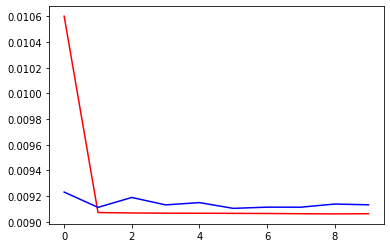

In [9]:

plt.plot(history.history["loss"],"r")
plt.plot(history.history["val_loss"],"b")
plt.show()

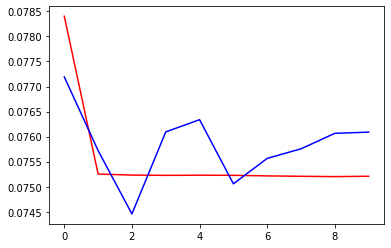

In [12]:
plt.plot(history.history["mae"],"r")
plt.plot(history.history["val_mae"],"b")


### Save model

In [6]:
model.save_weights("age_dataset_weights.h5")
model.save("age_dataset_model.model")

INFO:tensorflow:Assets written to: age_dataset_model.model/assets


# Testing

# Preprocess test dataset 

In [3]:
test_dataset

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
0,Q21536670,David Alexander Craig,(1887-1950) businessman,Male,NaN,Businessperson,1887,1950.0,NaN,63.0
1,Q1418096,Kurt Stössel,German association football player (1907-1978),Male,Germany,Athlete,1907,1978.0,NaN,71.0
2,Q2383112,Peter Warren Dease,Canadian explorer,Male,Canada,Explorer,1788,1863.0,NaN,75.0
3,Q3085138,François Leconte,French sailor,Male,France,Military personnel,1791,1872.0,NaN,81.0
4,Q10947958,Wanyan Dumu,NaN,NaN,NaN,NaN,1090,1129.0,NaN,39.0
...,...,...,...,...,...,...,...,...,...,...
122296,Q52156231,Karl Felix Marx,tekenleraar,Male,NaN,NaN,1877,1955.0,NaN,78.0
122297,Q879352,Bjarne Brustad,Norwegian musician,Male,Norway,Artist,1895,1978.0,NaN,83.0
122298,Q5342805,Edward Everett Cox,"newspaper publisher, Democrat",Male,United States of America,Publisher,1867,1931.0,NaN,64.0
122299,Q4983880,Madeleine Uggla,Swedish musician,Female,Sweden,Artist,1920,2018.0,NaN,98.0


### Feature Engineering

We perform 4 steps to our dataset by below function

1)handle missing vals

2)handle rare categorical features

3)create "Century column"

4)drop unwanted columns

In [4]:

def feature_eng(data):
    
    #handle nans in categorical features-replace nans with missing values
    categorical_nan=[feature for feature in data.columns if data[feature].dtypes=="O" and data[feature].isnull().sum()>=1]
    data[categorical_nan]=data[categorical_nan].fillna("Missing")
    
    #handle nans in numerical features-drop rows because there is only one missing value
    numerical_nan=[feature for feature in data.columns if data[feature].dtypes!="O" and data[feature].isnull().sum()>=1]
    data.dropna(subset=numerical_nan,inplace=True)
    
    #outliers if needed
    
    #handling rare categorical features
    categorical_features=[feature for feature in data.columns if data[feature].dtypes=="O"]
    for feature in categorical_features:
        temp=data.groupby(feature)['Age of death'].count()/len(data)
        temp_df=temp[temp>0.01].index
        data[feature]=np.where(data[feature].isin(temp_df),data[feature],'Rare_var')
        
    
    
    
    #Creating new column "Century" presenting each person‘s century
    time_slot=100
    data["Century"]=np.where((np.ceil(data["Birth year"]/time_slot)*time_slot-data["Birth year"])>
                             (data["Death year"]-np.floor(data["Death year"]/time_slot)*time_slot),
                             (np.floor(data["Birth year"]/100)*100),(np.floor(data["Death year"]/time_slot)*time_slot))
    #drop Id,Name,Short description,Birth year columns 
    data.drop(["Id","Name","Short description","Birth year"],axis=1,inplace=True)

    
    return data


In [5]:
feature_eng_test_dataset=feature_eng(test_dataset)

In [6]:
feature_eng_test_dataset

,Gender,Country,Occupation,Death year,Manner of death,Age of death,Century
0,Male,Missing,Businessperson,1950.0,Missing,63.0,1900.0
1,Male,Germany,Athlete,1978.0,Missing,71.0,1900.0
2,Male,Canada,Rare_var,1863.0,Missing,75.0,1800.0
3,Male,France,Military personnel,1872.0,Missing,81.0,1800.0
4,Missing,Missing,Missing,1129.0,Missing,39.0,1100.0
...,...,...,...,...,...,...,...
122296,Male,Missing,Missing,1955.0,Missing,78.0,1900.0
122297,Male,Norway,Artist,1978.0,Missing,83.0,1900.0
122298,Male,United States of America,Rare_var,1931.0,Missing,64.0,1800.0
122299,Female,Sweden,Artist,2018.0,Missing,98.0,1900.0


### one-hot encoding categorical features

In [7]:
from sklearn.preprocessing import OneHotEncoder
#from joblib import dump,load

##loading encoder
#onehot_encoder=load("onehot_encoder.joblib")

#categorical features
categorical_features=[feature for feature in feature_eng_test_dataset.columns if feature_eng_test_dataset[feature].dtypes=="O"]

#encoded feature array
encoded_array=onehot_encoder.transform(feature_eng_test_dataset[categorical_features])

#convert array into dataframe (41 columns)
encoded_categorical_cols=pd.DataFrame(encoded_array.toarray(),index=feature_eng_test_dataset.index)

#concatanate with training dataframe (41+7 columns)
temp=pd.concat([feature_eng_test_dataset,encoded_categorical_cols],axis=1)

#drop categorical columns(41+7-4)
encoded_test_dataset=temp.drop(categorical_features,axis=1)




In [8]:
encoded_test_dataset

,Death year,Age of death,Century,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
0,1950.0,63.0,1900.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1978.0,71.0,1900.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1863.0,75.0,1800.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1872.0,81.0,1800.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1129.0,39.0,1100.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122296,1955.0,78.0,1900.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
122297,1978.0,83.0,1900.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
122298,1931.0,64.0,1800.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
122299,2018.0,98.0,1900.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Scaling

In [12]:
from sklearn.preprocessing import MinMaxScaler

##loading scaler for features
#scaler_feature=load("MinMaxScaler_features.joblib")
#scaler_label=load("MinMaxScaler_labels.joblib")

features=[feature for feature in encoded_test_dataset.columns if feature!="Age of death"]
encoded_test_dataset[features]=scaler_feature.transform(encoded_test_dataset[features])

encoded_test_dataset["Age of death"]=scaler_label.transform(np.array(encoded_test_dataset["Age of death"]).reshape(-1,1))


/Users/kumara/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [14]:
scaled_test_dataset=encoded_test_dataset

In [15]:
scaled_test_dataset

,Death year,Age of death,Century,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
0,0.568284,0.372781,0.57459,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.568284,0.420118,0.57459,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.568284,0.443787,0.57459,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.568284,0.479290,0.57459,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.568284,0.230769,0.57459,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122296,0.568284,0.461538,0.57459,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
122297,0.568284,0.491124,0.57459,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
122298,0.568284,0.378698,0.57459,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
122299,0.568284,0.579882,0.57459,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [16]:
#devide scaled_train_dataset into train and target

test_target=scaled_test_dataset["Age of death"]

test_data=scaled_test_dataset.drop("Age of death",axis=1)


In [17]:
test_data

,Death year,Century,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
0,0.568284,0.57459,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.568284,0.57459,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.568284,0.57459,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.568284,0.57459,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.568284,0.57459,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122296,0.568284,0.57459,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
122297,0.568284,0.57459,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
122298,0.568284,0.57459,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
122299,0.568284,0.57459,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Feature Selection

In [19]:
#use this code if do testing on seperate notebook

#selected_feature_matrices=load("selected_features.joblib")
#selected_feature_matrices

array([False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False,  True, False,  True,  True, False])

In [20]:

#selected_features=test_data.columns[selected_feature_matrices]

#selected features
selected_features=test_data.columns[feature_sel_model.get_support()]

In [21]:
selected_features

Index([0, 14, 17, 23, 30, 31, 36, 38, 39], dtype='object')

In [22]:
#final test_data to fit for testing
test_data=test_data[selected_features]

In [23]:
test_data

,0,14,17,23,30,31,36,38,39
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
122296,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
122297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
122298,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
122299,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Trained model

In [25]:
#loading weights
#model.load_weights("age_dataset_weights.h5")


In [26]:
#evaluate model
list_of_scalers=model.evaluate(test_data,test_target)

print("mse",list_of_scalers[0])
print("mae",list_of_scalers[1])


122301/122301 [==============================] - 3s 28us/step
mse 0.009180315347781732
mae 0.07639523595571518


In [27]:
#get predictions
scaled_prediction=model.predict(test_data)

In [28]:
scaled_prediction

array([[0.3967547 ],
       [0.41672808],
       [0.41672808],
       ...,
       [0.42339188],
       [0.42903233],
       [0.41672808]], dtype=float32)

### Inverse scaling

In [30]:
predictions=scaler_label.inverse_transform(scaled_prediction)

In [31]:
predictions

array([[67.051544],
       [70.42705 ],
       [70.42705 ],
       ...,
       [71.55323 ],
       [72.50646 ],
       [70.42705 ]], dtype=float32)

### Create and save test dataset with predicted column

In [34]:
dataset_with_predictions=test_dataset.copy()
dataset_with_predictions["Predicted Age of death"]=predictions

In [35]:
dataset_with_predictions

,Gender,Country,Occupation,Death year,Manner of death,Age of death,Century,Predicted Age of death
0,Male,Missing,Businessperson,1950.0,Missing,63.0,1900.0,67.051544
1,Male,Germany,Athlete,1978.0,Missing,71.0,1900.0,70.427048
2,Male,Canada,Rare_var,1863.0,Missing,75.0,1800.0,70.427048
3,Male,France,Military personnel,1872.0,Missing,81.0,1800.0,66.461754
4,Missing,Missing,Missing,1129.0,Missing,39.0,1100.0,64.317131
...,...,...,...,...,...,...,...,...
122296,Male,Missing,Missing,1955.0,Missing,78.0,1900.0,64.317131
122297,Male,Norway,Artist,1978.0,Missing,83.0,1900.0,70.427048
122298,Male,United States of America,Rare_var,1931.0,Missing,64.0,1800.0,71.553230
122299,Female,Sweden,Artist,2018.0,Missing,98.0,1900.0,72.506462


In [36]:
dataset_with_predictions.to_csv("dataset_with_predictions.csv")